# Difração de Raios X

> This file is part of **Knowledge Journal**  
> See the project at: [https://github.com/augustodamasceno/knowledge-journal](https://github.com/augustodamasceno/knowledge-journal)

---

**Copyright (c) 2025, Augusto Damasceno.**  
All rights reserved.  
**SPDX-License-Identifier**: BSD-2-Clause


# Bibliotecas  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy.signal import find_peaks
from tabulate import tabulate

# Carrega Dados

In [2]:
data = np.genfromtxt('data.txt', delimiter='  ')
x = data[:, 0]
y = data[:, 1]

# Procura os Picos de Intensidade

In [18]:
peaks, _ = find_peaks(y,  distance=700, height=int(1.1*np.mean(y)))
print(f'Peaks Indexes:{str(peaks)[1:-1]}')

Peaks Indexes:   1 1736 2747 3617


# Cálculo de Espaçamento Interplanar

In [4]:
def espacamento_interplanar(n_ondas, comprimento_onda, theta2):
    theta = np.radians(theta2 / 2)
    d = (n_ondas * comprimento_onda) / (2 * np.sin(theta))
    return d

# Carta Encontrada pelo software  X’Pert HighScore Plus [2] usando o banco de dados ICSD [3]

> 

# Gráfico

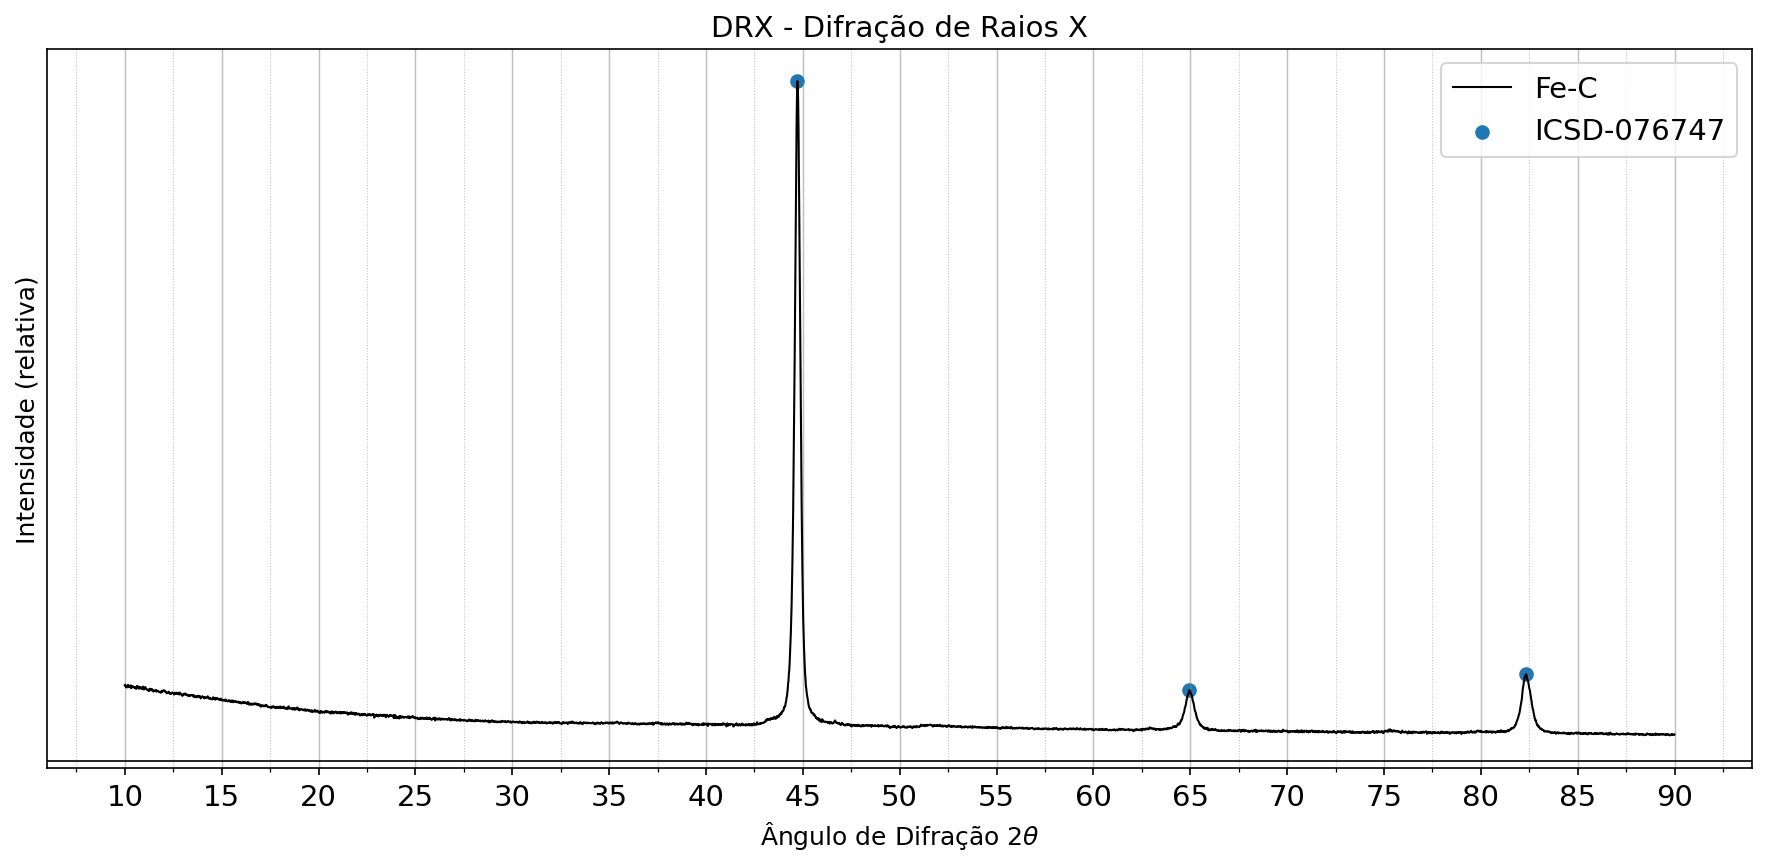

In [30]:
# Configure the plot
dpi = 150
filename = "DRX"
filetype = "jpg"
title = r"DRX - Difração de Raios X"
label1 = r"$intensity$"
xlabel = r"Ângulo de Difração $2\theta$"
ylabel = r"Intensidade (relativa)"
width = 12
height = 6

linewidth = 1.0
linewidth_axis = 0.8
linewidth_grid_lines_major = 0.7
linewidth_grid_lines_minor = 0.5
font = "DejaVu Sans"
font_size_title = 14
font_size_axis = 12
color1 = "black"
color_axis = "black"
legend_position =  "upper right"
color_grid_line_major = "gray"
color_grid_line_minor = "gray"
grid_lines_major_multiplicator_x = 5
grid_lines_major_multiplicator_y = 10000
grid_lines_minor_multiplicator_x = 2.5
grid_lines_minor_multiplicator_y = 5000

# Font
plt.rcParams.update({
    "font.family": font,
    "font.size": font_size_title,
    "text.usetex": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.alpha": 0.5
})


# Create figure
fig, ax = plt.subplots(figsize=(width, height), dpi=dpi)

# Plot sine and cosine
ax.plot(x, y, color=color1, linewidth=linewidth, label="Fe-C")
ax.scatter(x[peaks][1:], y[peaks][1:], label="ICSD-076747")

# Labels and title
ax.set_title(title, fontsize=font_size_title)
ax.set_xlabel(xlabel, fontsize=font_size_axis)
ax.set_ylabel(ylabel, fontsize=font_size_axis)

# Axes lines
ax.axhline(0, color=color_axis, linewidth=linewidth_axis)

# Enable grid
plt.grid(True)

# Grid Lines
plt.grid(which='major', color=color_grid_line_major, linestyle='-', linewidth=linewidth_grid_lines_major)
plt.grid(which='minor', color=color_grid_line_minor, linestyle=':', linewidth=linewidth_grid_lines_minor)

# Set grid spacing (e.g., every 1 unit for x and y axes)
plt.gca().xaxis.set_major_locator(MultipleLocator(grid_lines_major_multiplicator_x))  # Major ticks on x every 1 unit
#plt.gca().yaxis.set_major_locator(MultipleLocator(grid_lines_major_multiplicator_y))  # Major ticks on y every 0.2 units

# Optional: Enable minor ticks and grid lines for finer control
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(MultipleLocator(grid_lines_minor_multiplicator_x))  # Minor ticks on x every 0.5 units
#plt.gca().yaxis.set_minor_locator(MultipleLocator(grid_lines_minor_multiplicator_y))  # Minor ticks on y every 0.1 units

plt.legend()
plt.yticks([])

# Save as high-resolution figure
plt.tight_layout()
plt.savefig(f"{filename}.{filetype}", dpi=dpi, bbox_inches="tight")


# Show plot
plt.show()

# Tabela de Dados

In [6]:
tabela = []
for p in peaks:
    d = espacamento_interplanar(n_ondas=1, comprimento_onda=0.179, theta2=x[p])
    tabela.append([round(x[p], 2), round(y[p], 2), round(d, 6)])

print(tabulate(tabela, headers=["Ângulos de Difração 2θ (°)", "Intensidade", "Espaçamento interplanar (d em Å)"], tablefmt="grid"))

+------------------------------+---------------+------------------------------------+
|   Ângulos de Difração 2θ (°) |   Intensidade |   Espaçamento interplanar (d em Å) |
+==============================+===============+====================================+
|                        10.02 |         15660 |                           1.02485  |
+------------------------------+---------------+------------------------------------+
|                        44.72 |        139063 |                           0.235263 |
+------------------------------+---------------+------------------------------------+
|                        64.94 |         14570 |                           0.166711 |
+------------------------------+---------------+------------------------------------+
|                        82.34 |         17845 |                           0.135957 |
+------------------------------+---------------+------------------------------------+


# Referências

* [1] CALLISTER JR., William D. Ciência e engenharia de materiais: uma introdução. 5. ed. Rio de Janeiro: LTC, 2002. 589 p. ISBN 8521612885.  
* [2] MALVERN PANALYTICAL. X’Pert HighScore Plus [software]. Versão 3.0.0. Almelo: Malvern Panalytical,]. Disponível em: https://www.malvernpanalytical.com. Acesso em: 2 jun. 2025.  
* [3] FIZ KARLSRUHE – LEIBNIZ-INSTITUT FÜR INFORMATION INFRASTRUCTURE. Inorganic Crystal Structure Database (ICSD) [base de dados]. Karlsruhe: FIZ Karlsruhe, [20--]. Disponível em: https://icsd.fiz-karlsruhe.de/index.xhtml. Acesso em: 2 jun. 2025.